## 회귀

- 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함. 지도학습
- 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
!pip install xlrd

In [18]:
df = pd.read_excel("dataset/auto-mpg.xlsx",engine='openpyxl')
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [19]:
ndf.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [20]:
ndf.horsepower.replace('?',np.nan,inplace=True)

In [21]:
ndf.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [22]:
ndf.dropna(axis=0, inplace=True)

In [23]:
ndf.horsepower.astype('int')

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 392, dtype: int32

In [24]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [25]:
ndf.to_pickle("dataset/ndf.pickle")

In [26]:
ndf = pd.read_pickle("dataset/ndf.pickle")
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


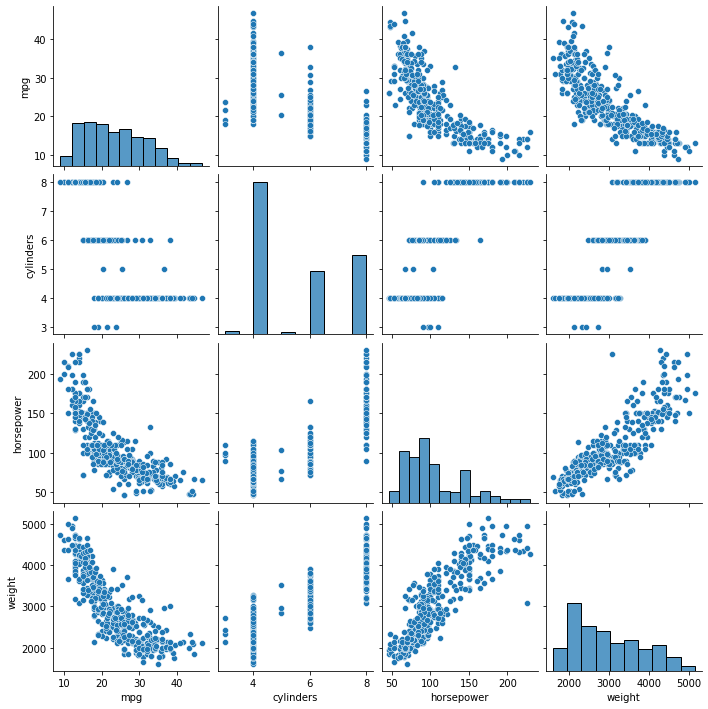

In [27]:
sns.pairplot(ndf)

### 회귀 평가 지표

- MAE: 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE: 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE: MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정)
- R Square: 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함.

In [18]:
# 속성(변수) 선택

X = ndf[['weight']]
y = ndf['mpg']

# train data와 test data로 구분(7:3 비율)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 11)

In [20]:
# 단순회귀분석 모형 생성 및 평가
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE:{0:.4f}, RMSE:{1:.4f}, R2:{2:.4f}'.format(mse, rmse, r2))

MSE:22.1690, RMSE:4.7084, R2:0.6411


In [21]:
# 회귀식의 기울기
print("회귀식의 기울기: ",lr.coef_)
# 회귀식의 절편
print("회귀식의 절편: ", lr.intercept_)
# 회귀식
y_hat = lr.predict(X)

회귀식의 기울기:  [-0.00762163]
회귀식의 절편:  45.971217704757684


<AxesSubplot:ylabel='Frequency'>

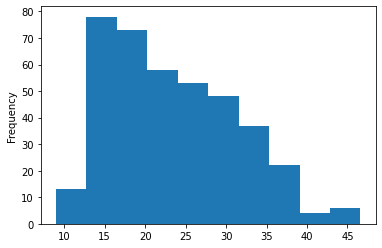

In [22]:
y.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

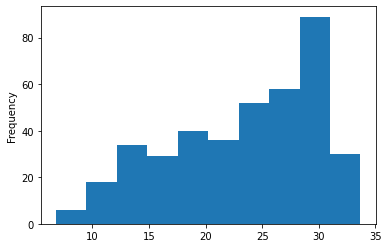

In [25]:
y_hat = pd.Series(y_hat)
y_hat.plot(kind = 'hist')

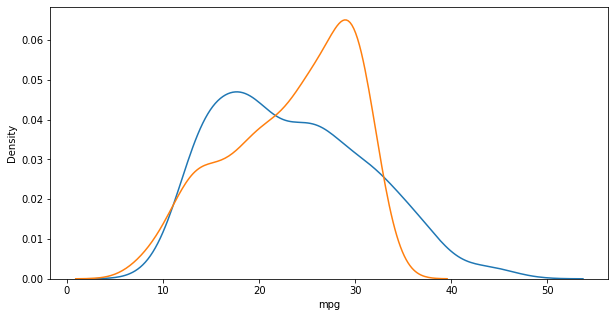

In [27]:
plt.figure(figsize = (10,5))
ax1 = sns.distplot(y, hist = False, label = 'y')
ax2 = sns.distplot(y_hat, hist = False, label = 'y_hat')

### 다항 회귀 분석

- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항 함수(PolynomialFeatures # 다항식 변환)를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘
- 다항 회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [28]:
df = pd.read_pickle("dataset/ndf.pickle")
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [29]:
X = ndf[['weight']] # 독립변수 X
y = ndf['mpg'] # 종속변수 y

# train data와 test data로 구분(7:3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [31]:
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

#                          2차항 적용
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)

print('원본 데이터:', X_train.shape)
print('변환된 데이터:', X_train_poly.shape)
X_train_poly

원본 데이터: (274, 1)
변환된 데이터: (274, 3)


array([[1.0000000e+00, 4.2090000e+03, 1.7715681e+07],
       [1.0000000e+00, 2.2230000e+03, 4.9417290e+06],
       [1.0000000e+00, 3.4100000e+03, 1.1628100e+07],
       [1.0000000e+00, 2.1640000e+03, 4.6828960e+06],
       [1.0000000e+00, 2.6150000e+03, 6.8382250e+06],
       [1.0000000e+00, 2.3850000e+03, 5.6882250e+06],
       [1.0000000e+00, 2.7950000e+03, 7.8120250e+06],
       [1.0000000e+00, 3.2450000e+03, 1.0530025e+07],
       [1.0000000e+00, 3.1020000e+03, 9.6224040e+06],
       [1.0000000e+00, 2.5060000e+03, 6.2800360e+06],
       [1.0000000e+00, 3.5700000e+03, 1.2744900e+07],
       [1.0000000e+00, 1.9400000e+03, 3.7636000e+06],
       [1.0000000e+00, 2.9900000e+03, 8.9401000e+06],
       [1.0000000e+00, 2.0850000e+03, 4.3472250e+06],
       [1.0000000e+00, 2.8550000e+03, 8.1510250e+06],
       [1.0000000e+00, 3.2880000e+03, 1.0810944e+07],
       [1.0000000e+00, 2.1250000e+03, 4.5156250e+06],
       [1.0000000e+00, 2.2460000e+03, 5.0445160e+06],
       [1.0000000e+00, 2.395

In [32]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.7087009262975685


Text(0, 0.5, 'mpg')

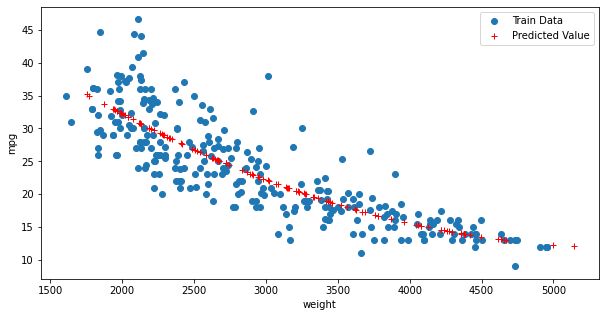

In [33]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label='Train Data') # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습된 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')


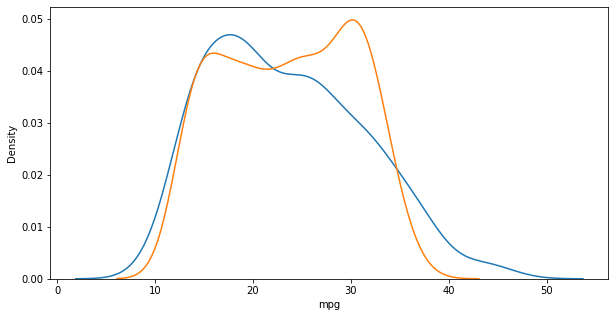

In [34]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label = 'y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat')

### 다중 회귀 분석

- 여러 개의 독립변수가 종속변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습

In [7]:
df = pd.read_pickle("dataset/ndf.pickle")
df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ndf = df.copy()
X = ndf.drop('mpg',axis=1)
y = ndf['mpg']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=10)

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r_square = lr.score(X_test, y_test)
print(r_square)

0.6939048496695597


In [42]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('mse',mse)
print('rmse',rmse)
print('r2',r2)

mse 17.330085628989956
rmse 4.162941943985041
r2 0.6939048496695597


In [43]:
# 회귀식의 기울기
print(lr.coef_)
# 회귀식의 절편
print(lr.intercept_)

[-0.60691288 -0.03714088 -0.00522268]
46.41435126963405


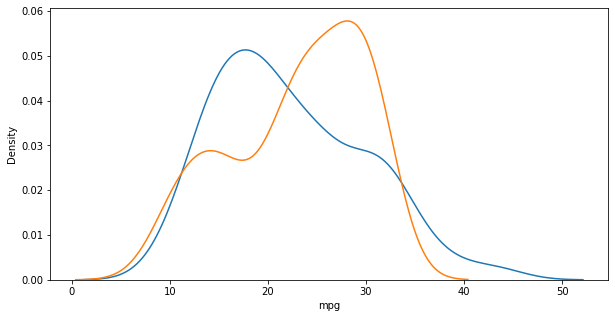

In [46]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test, hist = False, label = 'y_test')
ax2 = sns.distplot(y_hat, hist = False, label = 'y_hat')

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

ndf_ms = scaler.fit_transform(ndf)
ndf_ms_df = pd.DataFrame(data = ndf_ms, columns = ndf.columns)
ndf_ms_df.head()

,mpg,cylinders,horsepower,weight
0,0.239362,1.0,0.456522,0.536150
1,0.159574,1.0,0.646739,0.589736
2,0.239362,1.0,0.565217,0.516870
3,0.186170,1.0,0.565217,0.516019
4,0.212766,1.0,0.510870,0.520556


In [49]:
X = ndf_ms_df.drop('mpg', axis=1)
y = ndf_ms_df['mpg']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=10)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
r_square = lr.score(X_test, y_test)
print('r_square', r_square)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('mse',mse)
print('rmse',rmse)
print('r2',r2)

r_square 0.6939048496695597
mse 0.01225815246505061
rmse 0.11071654106343194
r2 0.6939048496695597


<AxesSubplot:xlabel='mpg', ylabel='Density'>

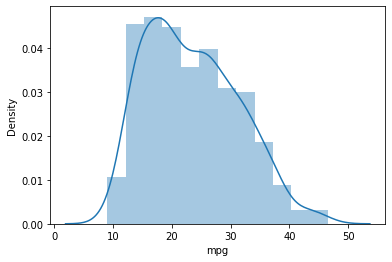

In [50]:
sns.distplot(ndf['mpg'])

<AxesSubplot:ylabel='Density'>

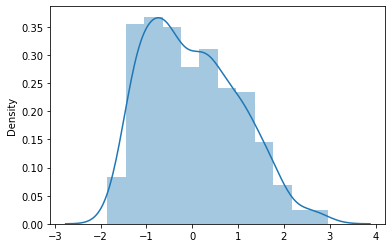

In [58]:
# StandardScaler()를 이용해서 변환

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(ndf[['mpg']])  # 주의! mpg를 2차원으로 만들어 줘야 한다!
scaled_data_df = pd.DataFrame(data=scaled_data)
sns.distplot(scaled_data_df)

<AxesSubplot:xlabel='mpg', ylabel='Density'>

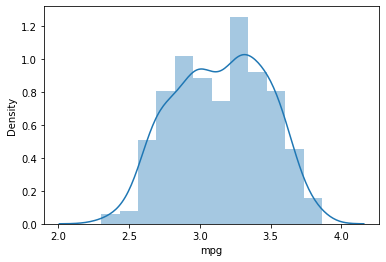

In [10]:
log_mpg = np.log1p(ndf['mpg'])
sns.distplot(log_mpg)

In [15]:
# 종속변수를 로그변환하여 모델링 및 평가를 수행하세요.

X_train, X_test, y_train, y_test= train_test_split(X, log_mpg, test_size=0.3, random_state=10)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
r_square = lr.score(X_test, y_test)
print('R_SQUARE: ', r_square)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ',mse)
print('RMSE: ',rmse)
print('R2: ',r2)

R_SQUARE:  0.7761638943019188
MSE:  0.023388334662896085
RMSE:  0.152932451307419
R2:  0.7761624988755151
